In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
downloaded = drive.CreateFile({'id':'13PP5bLk-vHthZvSJ8EmuHK11IpWJ05o7'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train_news.csv') 


In [6]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv("train_news.csv")

In [8]:
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [10]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

Removing the unnamed column:

In [12]:
df

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...
20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


#### Observation: we can see there are 20800 samples of news data in 5 columns named id, headline, written_by,news and label

#### And The label has two values : 1 if the news is fake and 0 if it is fact

In [13]:
## Checking for null values in any of the columns:

In [14]:
df.isnull().any()

id            False
headline       True
written_by     True
news           True
label         False
dtype: bool

So There are null values in the object rows.

In [15]:
#Checking the number of null values:
df.isnull().sum()

id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

#### Checking the percentage of null values:

In [16]:
print(np.round(df['headline'].isnull().mean(), 4))
print(np.round(df['written_by'].isnull().mean(), 4))
print(np.round(df['news'].isnull().mean(), 4))

0.0268
0.0941
0.0019


In [17]:
import missingno as mno

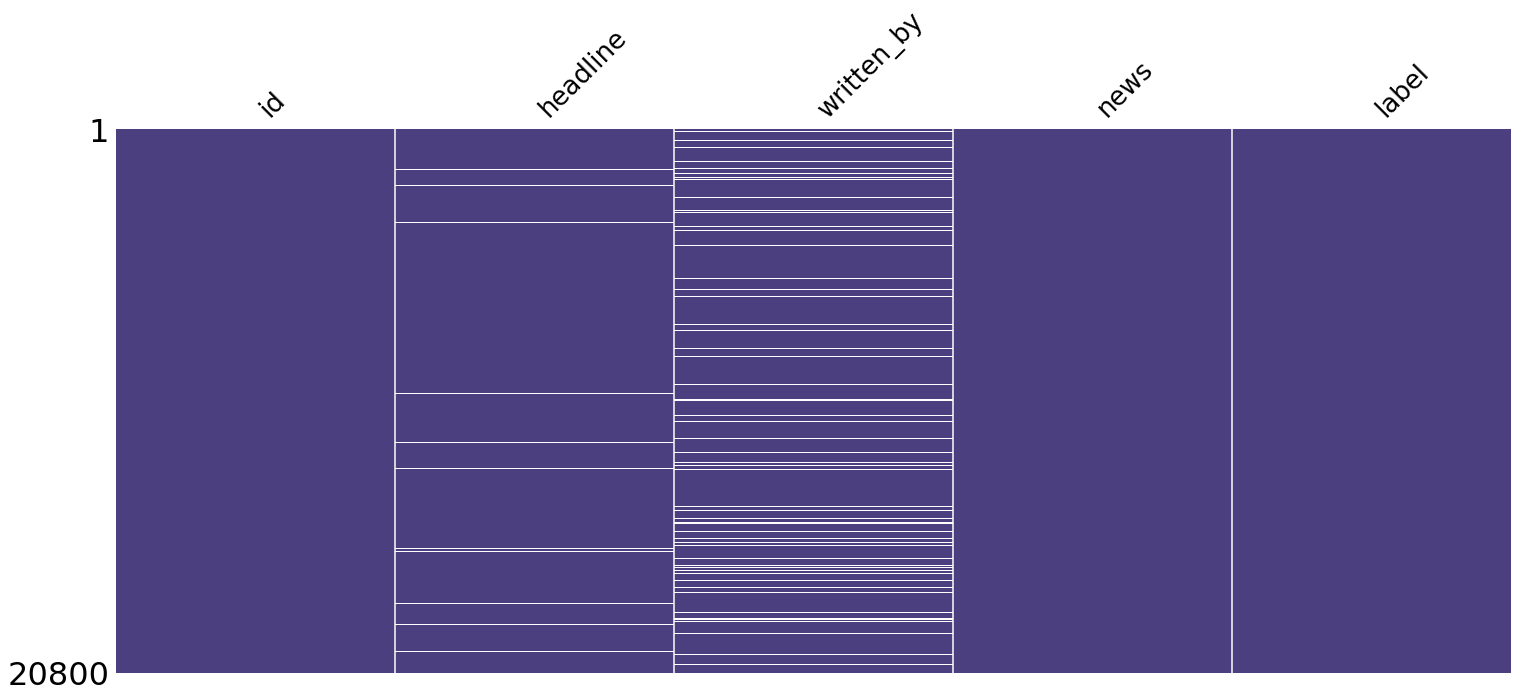

In [18]:
mno.matrix(df,color=(0.30, 0.25, 0.5),fontsize=26,sparkline=False)

In [19]:
df=df.dropna()

In [20]:
df.isnull().sum()

id            0
headline      0
written_by    0
news          0
label         0
dtype: int64

#### Now the missing values are removed

Univariate Analysis:

In [21]:
#Headline column unique values
print("number of unique values",format(df['headline'].nunique()))

number of unique values 17931


In [22]:
#Written_By unique values
print("number of unique values",format(df['written_by'].nunique()))

number of unique values 3838


In [23]:
#News unique values
print("number of unique values",format(df['news'].nunique()))

number of unique values 18017


unique values of label 2


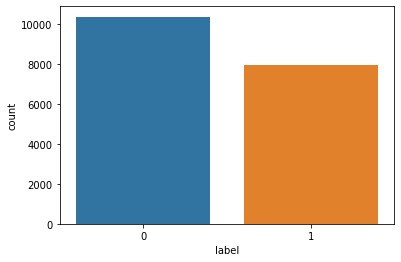

In [24]:
#Count of label
print("unique values of label",df['label'].nunique())
sns.countplot(df['label'])

#### Checking the frequency of label values:

In [25]:
df.label.value_counts()

0    10361
1     7924
Name: label, dtype: int64

Observation: We can observe that there are 10361 real news and 7964 fake news 

In [28]:
##### Checking the percentage of the label counts.
print("real news percentage:",round(len(df[df['label']==0])/len(df['label']),3)*100,'%')
print("fake news percentage:",round(len(df[df['label']==1])/len(df['label']),3)*100,'%')

real news percentage: 56.699999999999996 %
fake news percentage: 43.3 %


Observation :The data is almost equally balance by seeing the percentage .<br> -So while creating the model data balancing is not required

### Data Preprocessing/Data Cleaning:


In [29]:
import nltk
import string
import re
from nltk.corpus import stopwords

#### Creating a length of news column to compare before and after cleaning the data

In [30]:
df['news_length'] = df['news'].str.len()
df.head()

,id,headline,written_by,news,label,news_length
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,7936
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,6112
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,425
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,6516
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,9164


#### 1.Removing Html tags

In [31]:
def clean(text):
    cleaned = re.compile(r"<.*?>")
    return re.sub(cleaned," ",text)     

df.news = df.news.apply(clean)
df.news[2]

'Sunday on ABC’s “This Week,” while discussing the Republican plan to repeal and replace Obamacare Sen. Tom Cotton ( ) warned GOP House members “Do not walk the plank and vote for a bill that cannot pass the Senate and then have to face the consequences of that vote. ”  He added, “The bill probably can be fixed, but it’s going to take a lot of carpentry on that framework. ” (  The Hill) Follow Pam Key on Twitter @pamkeyNEN'

#### 2.Removing special characters


In [32]:
def is_special(text):
    empty = ''
    for i in text:
        if i.isalnum():
            empty = empty + i
        else:
            empty = empty + ' '
    return empty

df.news = df.news.apply(is_special)
df.news[2]

'Sunday on ABC s  This Week   while discussing the Republican plan to repeal and replace Obamacare Sen  Tom Cotton     warned GOP House members  Do not walk the plank and vote for a bill that cannot pass the Senate and then have to face the consequences of that vote     He added   The bill probably can be fixed  but it s going to take a lot of carpentry on that framework       The Hill  Follow Pam Key on Twitter  pamkeyNEN'

#### 3.Lower case


In [33]:
def lower(text):
    return text.lower()

df.news = df.news.apply(lower)
df.news[2]

'sunday on abc s  this week   while discussing the republican plan to repeal and replace obamacare sen  tom cotton     warned gop house members  do not walk the plank and vote for a bill that cannot pass the senate and then have to face the consequences of that vote     he added   the bill probably can be fixed  but it s going to take a lot of carpentry on that framework       the hill  follow pam key on twitter  pamkeynen'

#### 4. Removing stopwords

In [37]:
nltk.download('stopwords')   #For stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df.news = df.news.apply(remove_stopwords)
df.news[2]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['sunday',
 'abc',
 'week',
 'discussing',
 'republican',
 'plan',
 'repeal',
 'replace',
 'obamacare',
 'sen',
 'tom',
 'cotton',
 'warned',
 'gop',
 'house',
 'members',
 'walk',
 'plank',
 'vote',
 'bill',
 'pass',
 'senate',
 'face',
 'consequences',
 'vote',
 'added',
 'bill',
 'probably',
 'fixed',
 'going',
 'take',
 'lot',
 'carpentry',
 'framework',
 'hill',
 'follow',
 'pam',
 'key',
 'twitter',
 'pamkeynen']

#### 5.stemming

In [38]:
from nltk.stem import SnowballStemmer

def stem_text(text):
    snowball = SnowballStemmer('english')
    return " ".join([snowball.stem(w) for w in text])

df.news = df.news.apply(stem_text)
df.news[2]

'sunday abc week discuss republican plan repeal replac obamacar sen tom cotton warn gop hous member walk plank vote bill pass senat face consequ vote ad bill probabl fix go take lot carpentri framework hill follow pam key twitter pamkeynen'

Now Lets check the news length after Data Cleaning by creating a new length column

In [39]:
df['cleaned_length']=df.news.str.len()

In [40]:
df.head()

,id,headline,written_by,news,label,news_length,cleaned_length
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,washington sonni perdu tell georgian grow wear...,0,7936,4644
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,houston venezuela plan tactic approach design ...,0,6112,3725
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,sunday abc week discuss republican plan repeal...,0,425,238
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,augusta beleagu republican governor main seem ...,0,6516,3809
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,finian cunningham written extens intern affair...,1,9164,5786


In [41]:
#Let us check how much data has been cleaned
print("Removed length",(df.news_length.sum()) - (df.cleaned_length.sum()))
print("Before:",df.news_length.sum())
print("after:",df.cleaned_length.sum())

Removed length 35225392
Before: 87771325
after: 52545933


We can observe that there is so much data cleaned .

### Checking loud words in original data

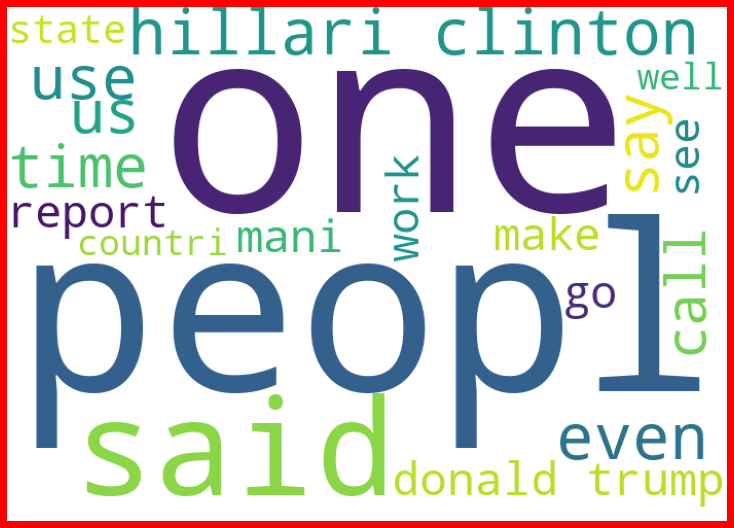

In [43]:
from wordcloud import WordCloud
spams = df['news'][df['label']==1]
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Checking loud words in original data

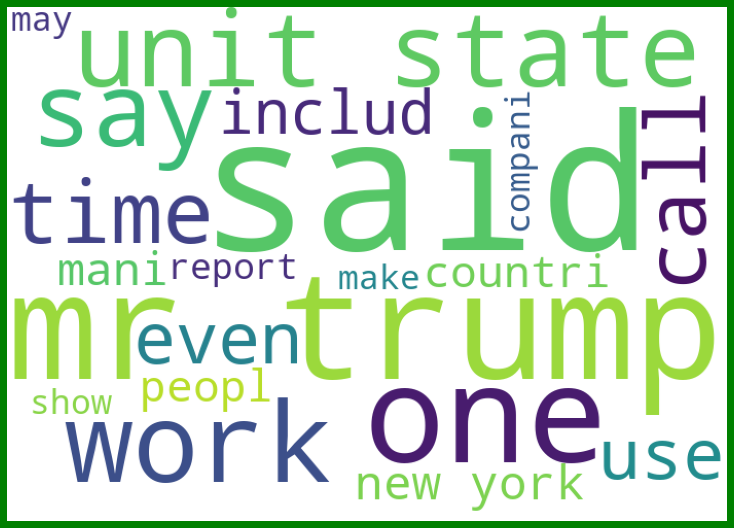

In [44]:
from wordcloud import WordCloud
not_spams = df['news'][df['label']==0]
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(not_spams))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Vectorization:<br>TFIDFVectorizer


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
x = tf_vec.fit_transform(df['news'])

In [46]:
y = df['label']

In [47]:
#Splitting into train test split
from sklearn.model_selection import train_test_split

x_train,x_test,Y_train,y_test = train_test_split(x,y,random_state=42)

#### Model: Multinomial NB:

In [48]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB(alpha=0)
naive.fit(x_train,Y_train)

#Making Prediction
y_pred = naive.predict(x_test)

#Printing the Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
#Accuracy Score
print('Final score =>', accuracy_score(y_test,y_pred))

#Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
print("\n",conf_mat)
#Classification Report
print(classification_report(y_test, y_pred))

Final score => 0.8958880139982502

 [[2479  119]
 [ 357 1617]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2598
           1       0.93      0.82      0.87      1974

    accuracy                           0.90      4572
   macro avg       0.90      0.89      0.89      4572
weighted avg       0.90      0.90      0.89      4572



#### Model:Passive Agressive Classifier Algorithm

In [49]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier( validation_fraction=0.25,C=3, max_iter=1000, random_state=42, 
                                   n_iter_no_change=8,
                                   shuffle=True,
                                   loss='hinge',
                                   n_jobs=-1)

#Training the model
pac.fit(x_train,Y_train)

#Makeing prediction
pred = pac.predict(x_test)

#Accuracy
score = accuracy_score(y_test,pred)
print("Accuracy: %0.3f" %score)

#Confusion Matrix
cm = confusion_matrix(y_test,pred)
print('\n',cm)

#Classification Report
print(classification_report(y_test, pred))

Accuracy: 0.964

 [[2516   82]
 [  84 1890]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2598
           1       0.96      0.96      0.96      1974

    accuracy                           0.96      4572
   macro avg       0.96      0.96      0.96      4572
weighted avg       0.96      0.96      0.96      4572



#### Using Hashing Vectorizer

In [50]:
from sklearn.feature_extraction.text import HashingVectorizer
hs_vectorizer=HashingVectorizer(n_features=30000, binary=bool)

x = hs_vectorizer.fit_transform(df['news']).toarray()

In [51]:
y = df['label']


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

MultinomialNB¶


In [58]:
# Train the model
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB(alpha=0)
naive.fit(x_train,y_train)

#Making Prediction
y_pred = naive.predict(x_test)

#Printing the Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
#Accuracy Score
print('Final score =>', accuracy_score(y_test,y_pred))


#Classification Report
print(classification_report(y_test, y_pred))


Final score => 0.8751367116296026
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3068
           1       0.90      0.81      0.85      2418

    accuracy                           0.88      5486
   macro avg       0.88      0.87      0.87      5486
weighted avg       0.88      0.88      0.87      5486



Passive Aggressive Classifier Algorithm¶


In [61]:
# Train the model
from sklearn.linear_model import PassiveAggressiveClassifier
pac_model = PassiveAggressiveClassifier( validation_fraction=0.25,C=3, max_iter=1000, random_state=42, 
                                         n_iter_no_change=8,
                                         shuffle=True,
                                         loss='hinge',
                                         n_jobs=-1)
pac_model.fit(x_train,y_train)

#Making Prediction
pred = pac_model.predict(x_test)

#Printing the Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
#Accuracy Score
print('Final score =>', accuracy_score(y_test,pred))

#Classification Report
print(classification_report(y_test,pred))

Final score => 0.958075100255195
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3068
           1       0.96      0.94      0.95      2418

    accuracy                           0.96      5486
   macro avg       0.96      0.96      0.96      5486
weighted avg       0.96      0.96      0.96      5486



### Comparing TFIDF and Hashing Vectorizing Passive Aggressive Classifier with Tfidf gives better results so saving this model for further usage

In [62]:
#Saving model:
import joblib
joblib.dump(pac, 'Fake_news_TFIDF.csv')

['Fake_news_TFIDF.csv']